In [ ]:
#perhaps we should call for a meating and give each of us some functions to apply
#just like mean , mod , std , IQR , b1 and bo and linear regression i guess tho
#we should also describe each shape of our visualizations
#we should calculate population mean tho
#dont forget to add Nour's and Haneen's code u frekin idiot ik u will forget but dont i fkn worn you!!!!

#-------------------------------------------------------------------------------------------------------------------------------
#Code used for correcting data 

# #correcting data
# data_frame['Cholesterol'] = data_frame['Cholesterol'].apply(lambda x : 244.6 if x == 0 else x)#there was some null values so we set em to the average

# #manipulating categorial data
# data_frame['Sex'] = data_frame['Sex'].apply(lambda x : 1 if x == 'M' else 0)
# data_frame['ExerciseAngina'] = data_frame['ExerciseAngina'].apply(lambda x : 1 if x == 'Y' else 0)
# data_frame.to_csv("heart.csv", index=False)
# data_frame.describe()

In [138]:
#Importing libs and csv file
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#scikit-learn lib for linear regression and splitting test/model data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


#reading csv file
data_frame =pd.read_csv('heart.csv')
data_frame2 =pd.read_csv('heart.csv')


In [104]:
#Spliting DataSet

#x with categorical data which we cant deal with
x = data_frame.drop('HeartDisease',axis=1)
#y only helds Heart Disease
y = data_frame.HeartDisease
#modified x terminates all categorical data and make 'dummies'-you may google this- out of it
modified_x = pd.get_dummies(x)
LR = LinearRegression()


Skewness >>  
-0.14435941846180994


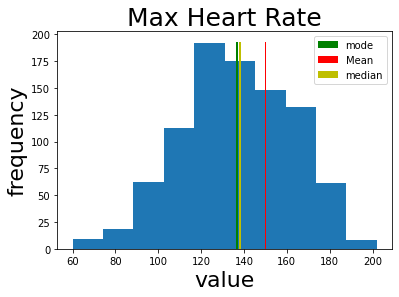

In [126]:
#Plotting Max heart rate ~my code
plt.hist(data_frame['MaxHR'])
plt.bar(data_frame['MaxHR'].mean(),height=193,color='g',label='mode')
plt.bar(data_frame['MaxHR'].mode(),height=193,color='r',label='Mean')
plt.bar(data_frame['MaxHR'].median(),height=193,color='y',label='median')
plt.legend()
plt.xlabel('value',size=22)
plt.ylabel('frequency',size=22)
plt.title('Max Heart Rate',size=25)
plt.show
print('Skewness >>  ' )
print(data_frame['MaxHR'].skew())
# Histogram Shape : Negatively Skewed

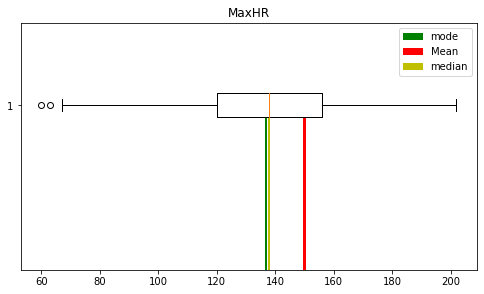

In [99]:
#ploting max hr as a box plot ~my code
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.title('MaxHR')
plt.boxplot(data_frame['MaxHR'],vert=False)
plt.bar(data_frame['MaxHR'].mean(),height=0.93,color='g',label='mode')
plt.bar(data_frame['MaxHR'].mode(),height=0.93,color='r',label='Mean')
plt.bar(data_frame['MaxHR'].median(),height=0.93,color='y',label='median')
plt.legend()
plt.show()

Text(0.5, 0, 'Excercise Angina')

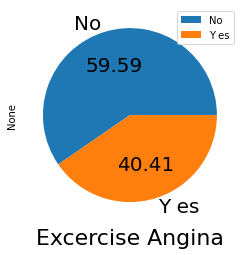

In [5]:
##Plotting Exercise Angina ~my code
data_frame.groupby('ExerciseAngina').size().plot(kind='pie',
                                         autopct='%.2f',
                                         textprops={'fontsize': 20},
                                         labels=['No','Y es'],
                                         legend=True).set_xlabel('Excercise Angina', size=22)


Text(0.5, 0, 'Heart Diseases')

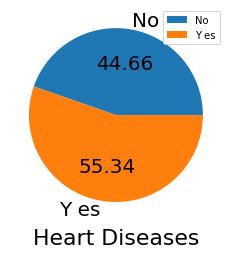

In [6]:
#Plotting Heart Disease ~my code
data_frame.groupby('HeartDisease').size().plot(kind='pie',
                                       autopct='%.2f',
                                       textprops={'fontsize': 20},
                                       label='',
                                       labels=['No','Y es'],
                                       legend=True).set_xlabel('Heart Diseases', size=22)


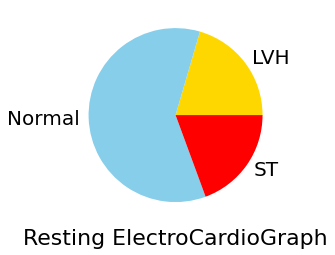

In [7]:
#Plotting Resting ElectroCardioGraph ~Samy's code with a bit of modification 'removed none from y axis and some unnecessery things i did not understand xd'

data_frame.groupby('RestingECG').size().plot( kind='pie', textprops={'fontsize': 20},
                                  colors=['gold' , 'skyblue','red' ],ylabel='').set_xlabel('Resting ElectroCardioGraph', size=22)
plt.show()


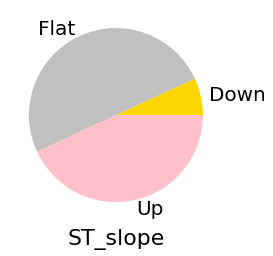

In [14]:
#Plotting Resting ElectroCardioGraph ~Samy's code 'renamed xlabel , weird colors tho'
data_frame.groupby('ST_Slope').size().plot( kind='pie', textprops={'fontsize': 20},
                                  colors=['gold' , 'silver' ,'pink'],
                                  ylabel='').set_xlabel('ST_slope', size=22)
plt.show()


In [ ]:
#Plotting Oldpeak ~Samy's code 'Porfecto'
data_frame.Oldpeak.hist()
print('\t\t\t\t\t\tOldpeak')
plt.show()
# Histogram Shape : Spiked

<function matplotlib.pyplot.show(close=None, block=None)>

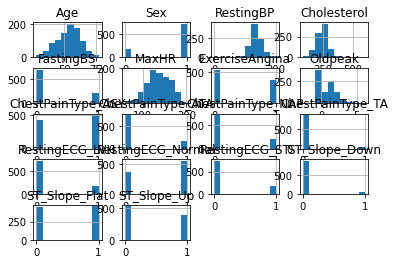

In [9]:
#Ploting the whole modified dataset ~My code
modified_x.hist()
plt.show

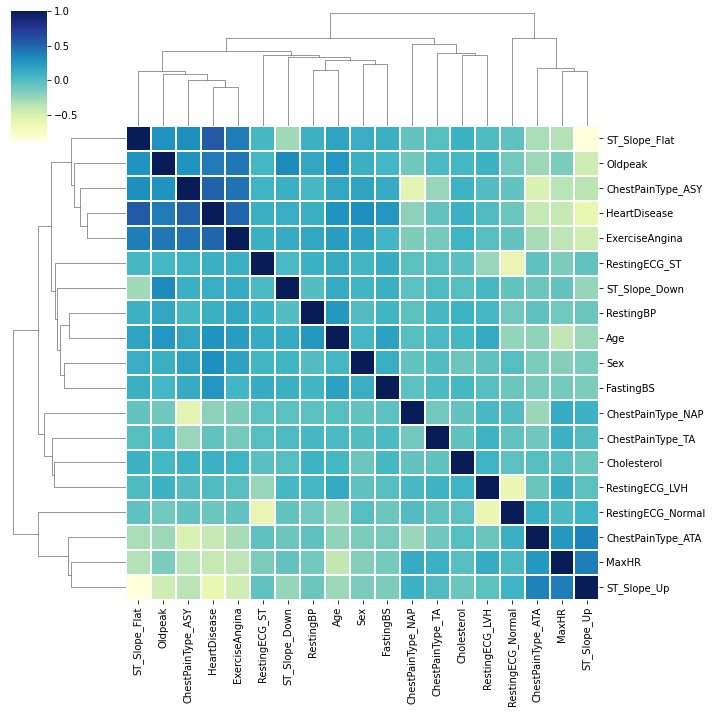

In [139]:
correlations =pd.get_dummies(data_frame2)
corrmat = correlations.corr()
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
  
cg

In [140]:
correlations =pd.get_dummies(data_frame2)
correlations.corr()
 

,HeartDisease,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Age,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
HeartDisease,1.000000,0.305445,0.107589,0.093989,0.267291,-0.400421,0.494282,0.403951,0.282039,0.516716,-0.401924,-0.212964,-0.054790,0.010670,-0.091580,0.102527,0.122527,0.554134,-0.622164
Sex,0.305445,1.000000,0.005133,-0.101750,0.120076,-0.189186,0.190664,0.105734,0.055750,0.183876,-0.161522,-0.066486,-0.004031,-0.049518,-0.010634,0.063715,0.066036,0.116077,-0.150942
RestingBP,0.107589,0.005133,1.000000,0.080742,0.070193,-0.112135,0.155101,0.164803,0.254399,0.048824,-0.046153,-0.041348,0.049855,0.053166,-0.116851,0.090447,-0.007912,0.099207,-0.096146
Cholesterol,0.093989,-0.101750,0.080742,1.000000,0.042925,-0.017166,0.077528,0.053036,0.053337,0.084485,-0.015241,-0.062222,-0.047310,0.075526,-0.042412,-0.024566,-0.008944,0.093598,-0.089954
FastingBS,0.267291,0.120076,0.070193,0.042925,1.000000,-0.131438,0.060451,0.052698,0.198039,0.131176,-0.140514,-0.039249,0.026885,-0.011656,-0.093028,0.127110,0.105102,0.107006,-0.161730
MaxHR,-0.400421,-0.189186,-0.112135,-0.017166,-0.131438,1.000000,-0.370425,-0.160691,-0.382045,-0.354963,0.253735,0.134580,0.100025,0.125793,0.023801,-0.157879,-0.073316,-0.342581,0.383397
ExerciseAngina,0.494282,0.190664,0.155101,0.077528,0.060451,-0.370425,1.000000,0.408752,0.215793,0.430034,-0.300365,-0.166030,-0.128105,-0.016382,-0.072924,0.107036,0.136439,0.382237,-0.455676
Oldpeak,0.403951,0.105734,0.164803,0.053036,0.052698,-0.160691,0.408752,1.000000,0.258612,0.280026,-0.262124,-0.106212,0.032231,0.086794,-0.116719,0.055958,0.322130,0.283295,-0.450577
Age,0.282039,0.055750,0.254399,0.053337,0.198039,-0.382045,0.215793,0.258612,1.000000,0.166607,-0.218165,-0.011335,0.032042,0.145727,-0.230566,0.136798,0.138397,0.185568,-0.258067
ChestPainType_ASY,0.516716,0.183876,0.048824,0.084485,0.131176,-0.354963,0.430034,0.280026,0.166607,1.000000,-0.522432,-0.577670,-0.249003,0.002289,-0.063606,0.076438,0.103407,0.303645,-0.359443


In [117]:
#Applying model

#splitting data again but this time 80% for training model and 20% for testing model
xTrain, xTest, yTrain, yTest = train_test_split(modified_x, y, test_size = 0.25, random_state = 42)
#applying linear regression for skcikit learn
LR.fit(xTrain,yTrain)
#predicting y
yPrediction  =  LR.predict(xTest)
yPrediction 
# predicting accuracy 
score=r2_score(yTest,yPrediction )
print('r squared is : ',score)
print('Mean squared eror is : ',mean_squared_error(yTest,yPrediction ))
print('Root mean squared error is : ',np.sqrt(mean_squared_error(yTest,yPrediction )))

r squared is :  0.555835068095472
Mean squared eror is :  0.1086146986600562
Root mean squared error is :  0.32956744174759767


In [11]:
#Experimental block for mean calcs
#we can define all of our functions in here

def calc_mean(meow):
    sum =0
    count = 0
    for i in meow:
        sum+=i
        count +=1
    return sum/count


mean =calc_mean(data_frame['MaxHR'])
print(mean)

#To Do!!
#i dont remember but i mentioned them above look above before i get u killed

136.80936819172112


In [118]:
data_frame.describe()

,HeartDisease,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Age,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.553377,0.789760,132.396514,244.628758,0.233115,136.809368,0.404139,0.887364,53.510893,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.068627,0.501089,0.430283
std,0.497414,0.407701,18.514154,53.318031,0.423046,25.460334,0.490992,1.066570,9.432617,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.252957,0.500271,0.495386
min,0.000000,0.000000,0.000000,85.000000,0.000000,60.000000,0.000000,-2.600000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,130.000000,244.600000,0.000000,138.000000,0.000000,0.600000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,77.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


186.7116231026917
86.90711328075055
-0.14435941846180994


In [135]:
for column in data_frame:
    print('\n$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    print(column)
    print('\nPopulation upper Mean >> ')
    print(data_frame[column].mean() + 1.96*data_frame[column].std())
    print('\nPopulation lower mean >> ')
    print(data_frame[column].mean() - 1.96*data_frame[column].std())
    print('\nSkewness >> ')
    print(data_frame[column].skew())
#need to implement GUI


$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
HeartDisease

Population upper Mean >> 
1.5283078333558962

Population lower mean >> 
-0.42155402071973047

Skewness >> 
-0.21508633825088655

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Sex

Population upper Mean >> 
1.588854074303409

Population lower mean >> 
-0.009333377135652965

Skewness >> 
-1.4245395436295134

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
RestingBP

Population upper Mean >> 
168.68425623623935

Population lower mean >> 
96.10877208620073

Skewness >> 
0.1798393100516288

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Cholesterol

Population upper Mean >> 
349.1320989847331

Population lower mean >> 
140.12541735513838

Skewness >> 
1.3737702439817168

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
FastingBS

Population upper Mean >> 
1.062284892898618

Population lower mean >> 
-0.5960539560794459

Skewness >> 
1.2644841750727027

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
MaxHR

Population upper Mean >> 
186.7116231026917

Population lower mean >> 
86.907113280750